# EDA — Deals and Companies

This notebook performs exploratory data analysis (EDA) for `companies.parquet` and `deals.parquet` in this repository.
Run all cells sequentially. To run inside the project's virtual environment, use:

/Users/c0p0frj/Documents/deal-valuation-imputer/.venv/bin/python -m jupyter notebook

Or open this notebook in VS Code and select the project's Python kernel.

The notebook produces summary CSVs and plots to help guide modeling and imputation of `PostValuation`.

In [1]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
print('pandas', pd.__version__, 'numpy', np.__version__)

pandas 2.3.3 numpy 2.0.2


In [2]:
# Data loading with safe engine fallback
def read_parquet_safe(path):
    try:
        return pd.read_parquet(path, engine='fastparquet')
    except Exception:
        return pd.read_parquet(path, engine='pyarrow')

companies = read_parquet_safe('companies.parquet')
deals = read_parquet_safe('deals.parquet')
print('companies', companies.shape, 'deals', deals.shape)

companies (6487, 40) deals (30680, 39)


In [4]:
display(companies.head(3))
display(deals.head(3))

companies.info()
deals.info()

,CompanyName,CompanyAlsoKnownAs,CompanyFormerName,CompanyLegalName,Description,Keywords,CompanyFinancingStatus,CompanyFinancingStatusDate,TotalRaised,TotalRaisedNativeAmount,...,PrimaryContactPBId,PrimaryContactFirstName,PrimaryContactLastName,PrimaryContactMiddle,PrimaryContactPrefix,PrimaryContactSuffix,PrimaryContact,PrimaryContactTitle,RowID,LastUpdated
CompanyID,,,,,,,,,,,,,,,,,,,,,
10022-68,Boart Longyear,None,None,Boart Longyear Ltd.,Boart Longyear Ltd is a U.S.-based ASX-listed ...,"contract drilling service, down-hole instrumen...",Private Equity-Backed,04/10/2024,3027.643662,3027.643662,...,64236-52P,Jeffrey,Olsen,None,Mr.,None,Jeffrey Olsen,"President, Chief Executive Officer and Board M...",d1f91d5975321ea1e186f197e4d465ab0fde607f532726...,04/20/2024
10026-37,Greenhill & Company,Greenhill,None,"Greenhill & Co, Inc.",Greenhill & Co Inc is an independent investmen...,"financial advice, financings and capital raisi...",Corporate Backed or Acquired,12/01/2023,832.500000,832.500000,...,15456-79P,Gregory,Randolph,G.,Mr.,None,Gregory Randolph,Managing Director,47610123c0f0a724b969bafff9325467dd90cf21f16100...,03/23/2024
10049-68,Kohlberg & Company,Kohlberg,None,"Kohlberg & Co., L.L.C.",Operator of a private equity firm intended to ...,"add-on acquisition, growth capital, pe firm, p...",Venture Capital-Backed,09/05/2023,12.196849,12.196849,...,299670-85P,Marina,Chalik,None,Ms.,None,Marina Chalik,"Vice President, Investor Services",e2b674922c9d7df7c56ed00c0bbe9ebaa9bcf1916e3604...,03/06/2024


,CompanyID,CompanyName,DealNo,DealDate,AnnouncedDate,DealSize,DealStatus,DealSizeStatus,PremoneyValuation,PostValuation,...,Debts,DebtRaisedInRound,ContingentPayout,Employees,BusinessStatus,FinancingStatus,SiteLocation,ExitScope,RowID,LastUpdated
DealID,,,,,,,,,,,,,,,,,,,,,
247042-45T,515209-69,Gridflex Energy,2,2025-04-30,NaT,50.793247,Upcoming,Estimated,NaN,169.310582,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (M&A),"Boise, ID",None,7fbfd5b0377ea28524fb9aa29a4d7dc69b77cd4afa9313...,2024-05-07
256383-64T,593468-20,Personal Protective Equipment Business),1,2025-03-31,2024-04-07,640.000000,Upcoming,Actual,NaN,640.000000,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (M&A),"Rosewell, GA",None,edb67b8eea39fd78af875c8ff473c58e5fdf8a12c637ee...,2024-04-15
256415-23T,281224-09,Ammobia,6,2025-01-01,NaT,NaN,Upcoming,None,NaN,NaN,...,None,NaN,NaN,NaN,Generating Revenue,Pending Transaction (VC),"San Francisco, CA",None,84cdba37bb3ae584496b965a8d9991fcecc4f14eced0ce...,2024-04-08


<class 'pandas.core.frame.DataFrame'>
Index: 6487 entries, 10022-68 to 596978-56
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CompanyName                  6487 non-null   object 
 1   CompanyAlsoKnownAs           2767 non-null   object 
 2   CompanyFormerName            1536 non-null   object 
 3   CompanyLegalName             6036 non-null   object 
 4   Description                  6482 non-null   object 
 5   Keywords                     6484 non-null   object 
 6   CompanyFinancingStatus       6487 non-null   object 
 7   CompanyFinancingStatusDate   6336 non-null   object 
 8   TotalRaised                  5483 non-null   float64
 9   TotalRaisedNativeAmount      5471 non-null   float64
 10  TotalRaisedNativeCurrency    5483 non-null   object 
 11  BusinessStatus               6451 non-null   object 
 12  BusinessStatusDate           6451 non-null   object 
 13  OwnershipSt

In [8]:
print('Joining companies onto deals (left join on CompanyID)')

_deals = deals.copy()
_companies = companies.copy()

deals_joined = _deals.merge(_companies, on='CompanyID', how='left')
matched = deals_joined['RowID_y'].notna().sum()

print(f'Before shape: {_deals.shape}, After shape: {deals_joined.shape}, Matched company rows: {matched}')

# write joined parquet for reuse by EDA and other scripts
joined_path = 'deals_joined.parquet'
deals_joined.to_parquet(joined_path, index=False)
print(f'Wrote joined parquet: {joined_path} (rows: {len(deals_joined)})')


Joining companies onto deals (left join on CompanyID)
Before shape: (30680, 39), After shape: (30680, 79), Matched company rows: 30680
Wrote joined parquet: deals_joined.parquet (rows: 30680)


,missing_count,missing_percent
AddOnPlatform,30533,99.52
ContingentPayout,30525,99.49
AddOnSponsors,30500,99.41
DealType3,30465,99.30
ExitScope,28339,92.37
Employees_x,28297,92.23
ParentCompanyID,27126,88.42
ParentCompany,27126,88.42
Ticker,26351,85.89
Exchange,26348,85.88


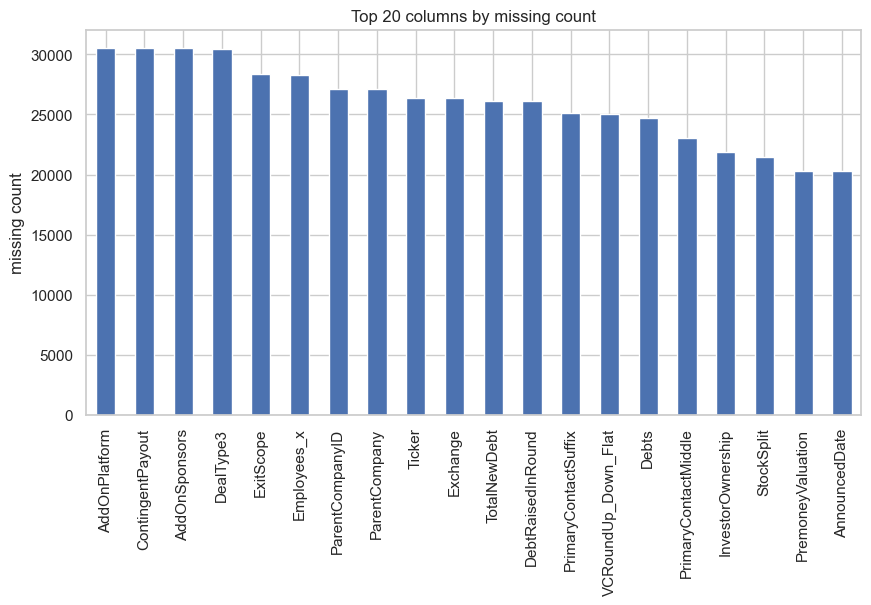

In [9]:
# Missingness overview
missing = deals_joined.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(deals_joined)).round(4) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})
display(missing_df.head(40))
# bar plot top 20 missing
top_missing = missing_df.head(20)
top_missing['missing_count'].plot(kind='bar')
plt.title('Top 20 columns by missing count')
plt.ylabel('missing count')
plt.show()

Column: PostValuation
count    12684.000000
mean       510.766002
std       2773.326023
min          0.032500
25%         19.500001
50%         54.043151
75%        195.000000
max      85800.000000
Name: PostValuation, dtype: float64
nulls: 17996


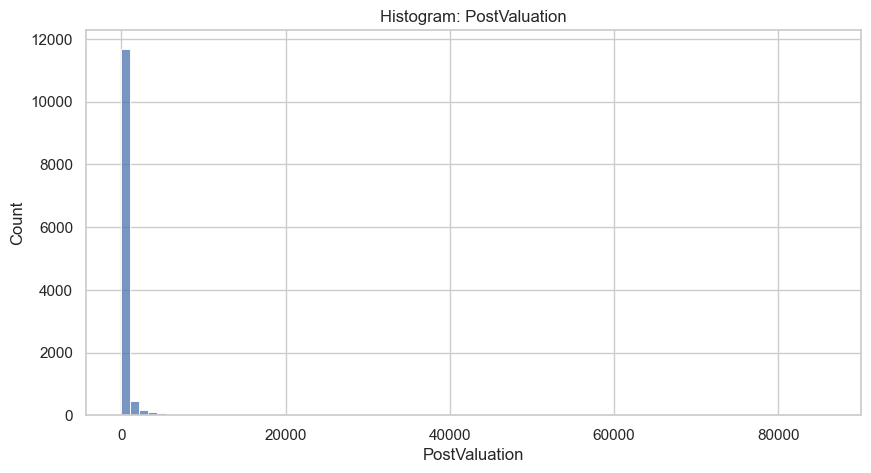

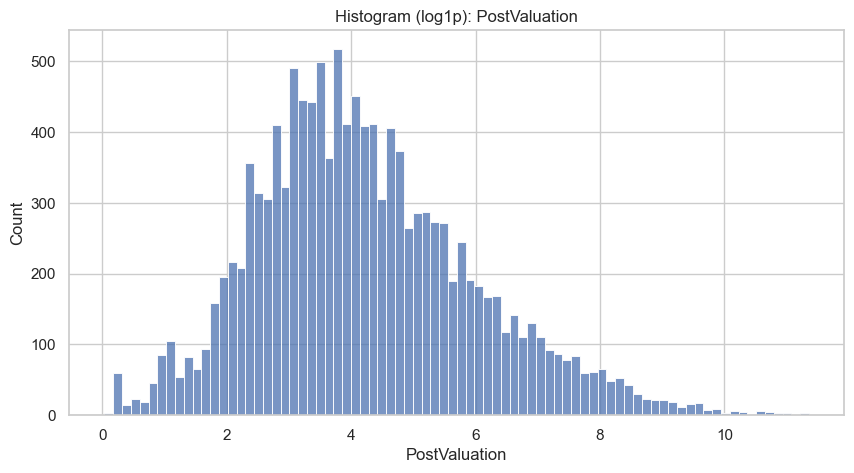

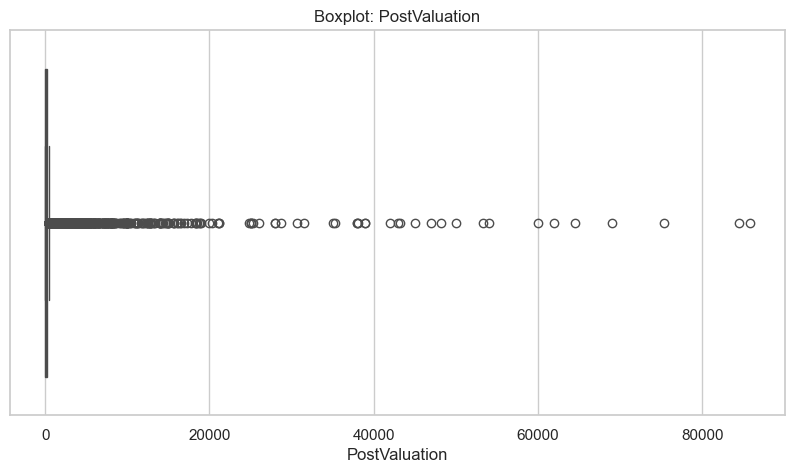

Column: PremoneyValuation
count    10357.000000
mean       244.394620
std       1597.796726
min          0.013013
25%         11.999996
50%         31.000000
75%        100.000000
max      85800.000000
Name: PremoneyValuation, dtype: float64
nulls: 20323


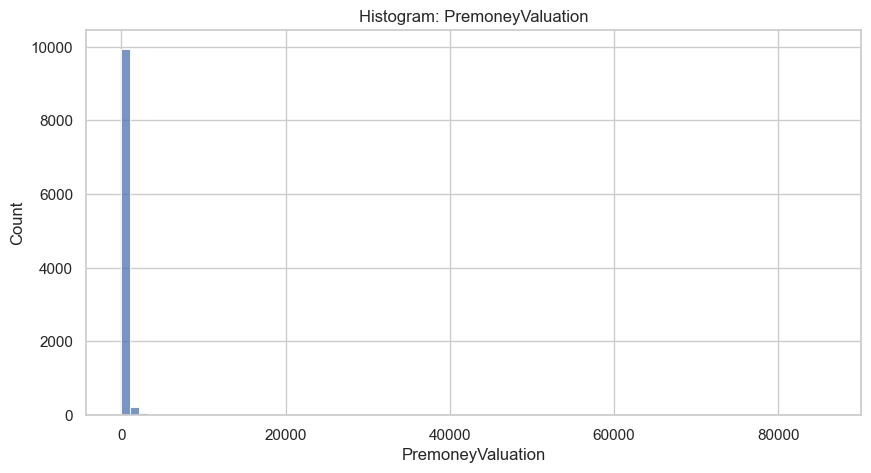

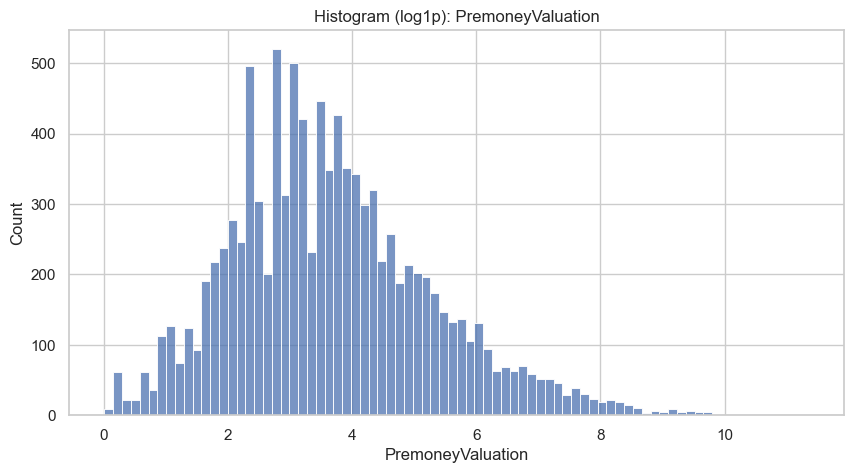

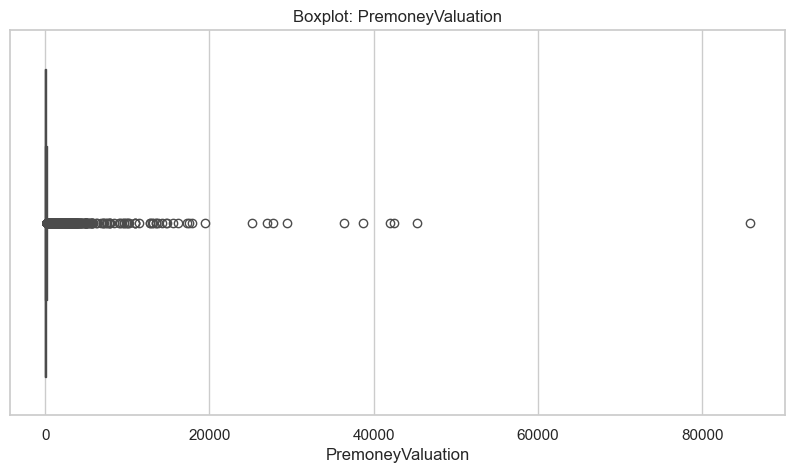

Column: DealSize
count    25144.000000
mean       171.699154
std       1305.616956
min          0.000033
25%          3.000000
50%         10.138112
75%         47.000000
max      75400.000000
Name: DealSize, dtype: float64
nulls: 5536


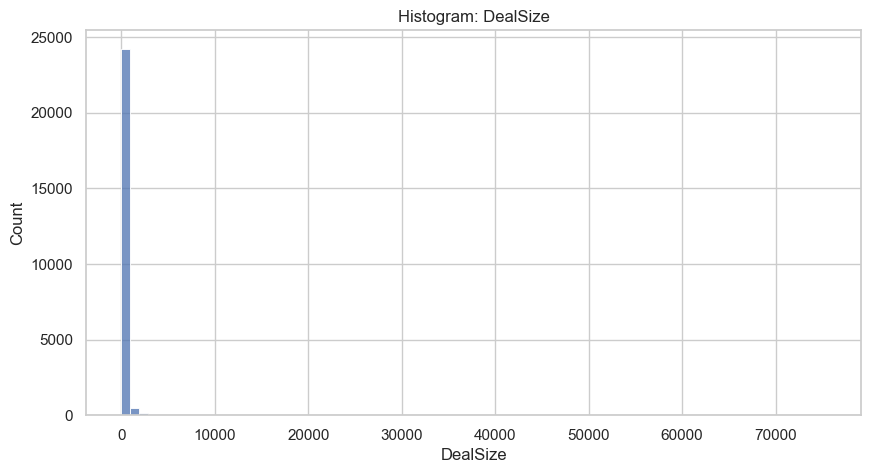

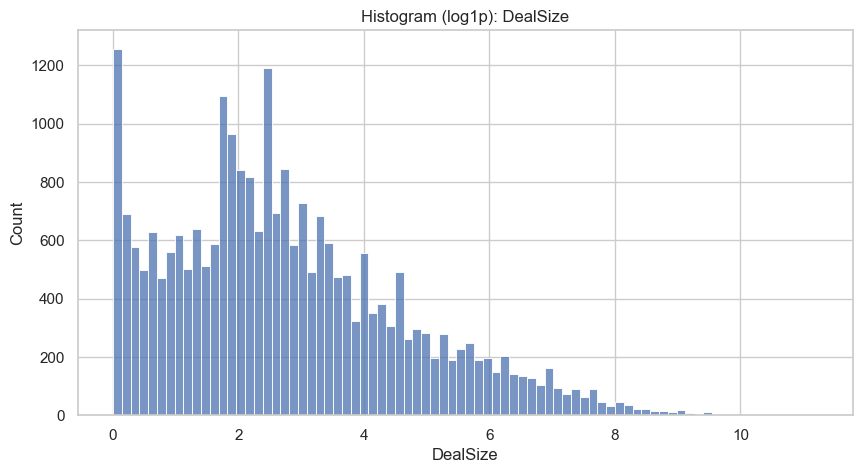

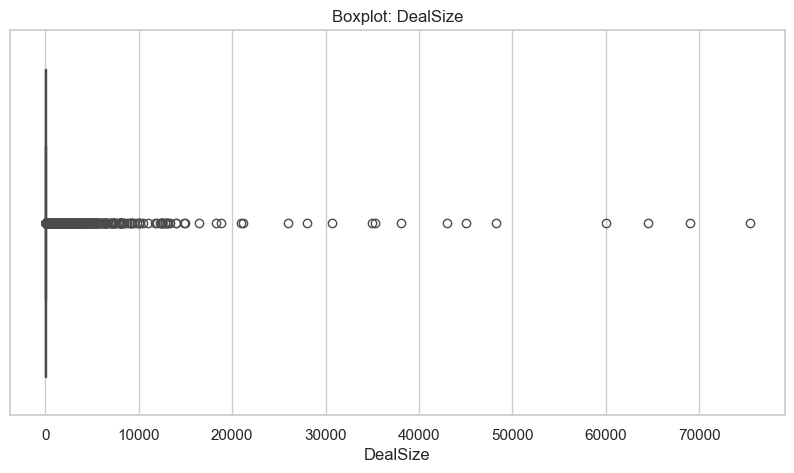

In [10]:
# Target-specific exploration: PostValuation and related columns
for col in ['PostValuation','PremoneyValuation','DealSize']:
    if col in deals_joined.columns:
        print('Column:', col)
        print(deals_joined[col].describe())
        print('nulls:', deals_joined[col].isna().sum())
        # histograms
        plt.figure()
        sns.histplot(deals_joined[col].dropna(), bins=80, kde=False)
        plt.title(f'Histogram: {col}')
        plt.show()
        # log1p histogram
        plt.figure()
        sns.histplot(np.log1p(deals_joined[col].dropna().clip(lower=0)), bins=80, kde=False)
        plt.title(f'Histogram (log1p): {col}')
        plt.show()
        # boxplot
        plt.figure()
        sns.boxplot(x=deals_joined[col].dropna())
        plt.title(f'Boxplot: {col}')
        plt.show()

In [16]:
deals.loc[deals['PostValuation'].idxmax()]


CompanyID                                                        55815-22
CompanyName                                                      Coinbase
DealNo                                                                 16
DealDate                                              2021-04-14 00:00:00
AnnouncedDate                                         2021-02-25 00:00:00
DealSize                                                              1.0
DealStatus                                                      Completed
DealSizeStatus                                                     Actual
PremoneyValuation                                                 85800.0
PostValuation                                                     85800.0
PostValuationStatus                                             Estimated
PercentAcquired                                                       NaN
RaisedToDate                                                   526.326826
VCRound                               

In [17]:
pv = deals['PostValuation'].dropna()

if pv.size == 0:
    print('No non-null PostValuation values')
elif pv.size == 1:
    print('Only one non-null PostValuation value; showing that row')
    display(deals.loc[pv.idxmax()])
else:
    second_idx = pv.nlargest(2).index[-1]
    display(deals.loc[second_idx])



CompanyID                                                        10396-99
CompanyName                                                     U.S. Bank
DealNo                                                                 37
DealDate                                              2022-11-10 00:00:00
AnnouncedDate                                                         NaT
DealSize                                                           3800.0
DealStatus                                                      Completed
DealSizeStatus                                                     Actual
PremoneyValuation                                                     NaN
PostValuation                                                     84444.0
PostValuationStatus                                             Estimated
PercentAcquired                                                       4.5
RaisedToDate                                                      64000.0
VCRound                               

In [15]:
deals.loc[deals['PostValuation'].idxmin()]

CompanyID                                                       109540-09
CompanyName                      Paravision (Network Management Software)
DealNo                                                                  1
DealDate                                                              NaT
AnnouncedDate                                                         NaT
DealSize                                                           0.0125
DealStatus                                                      Completed
DealSizeStatus                                                  Estimated
PremoneyValuation                                                    0.02
PostValuation                                                      0.0325
PostValuationStatus                                                Actual
PercentAcquired                                                     38.46
RaisedToDate                                                       0.0125
VCRound                               

,count,mean,std,min,25%,50%,75%,max
DealNo,30680.0,4.866330,4.678325,1.000000,2.000000,3.000000,6.000000,50.000000
DealSize,25144.0,171.699154,1305.616956,0.000033,3.000000,10.138112,47.000000,75400.000000
PremoneyValuation,10357.0,244.394620,1597.796726,0.013013,11.999996,31.000000,100.000000,85800.000000
PostValuation,12684.0,510.766002,2773.326023,0.032500,19.500001,54.043151,195.000000,85800.000000
PercentAcquired,12831.0,40.418216,32.243923,0.005000,16.960000,28.570000,51.000000,100.000000
RaisedToDate,25425.0,424.631197,2613.805591,0.001000,6.000000,22.890545,105.250000,79586.000000
TotalInvestedCapital,22402.0,81.529253,354.353021,0.000033,2.594863,9.098380,32.000000,13000.000000
InvestorOwnership,8787.0,48.959077,18.988938,0.625016,34.564417,48.521226,62.848347,99.582394
TotalInvestedEquity,17333.0,46.132435,238.174420,0.001000,3.598630,9.962489,28.000000,12800.000000
TotalNewDebt,4530.0,282.749208,682.175683,0.001144,2.751198,21.982500,275.461250,13000.000000


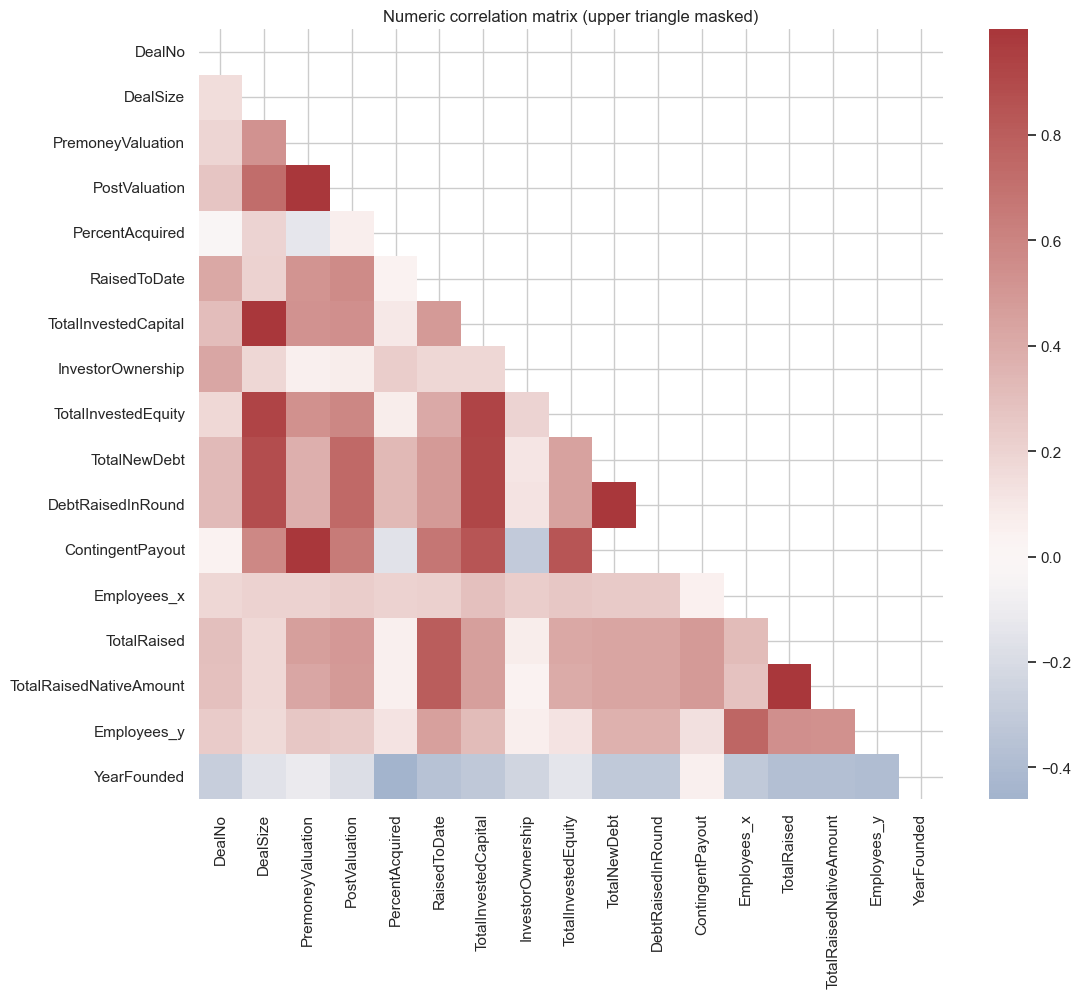

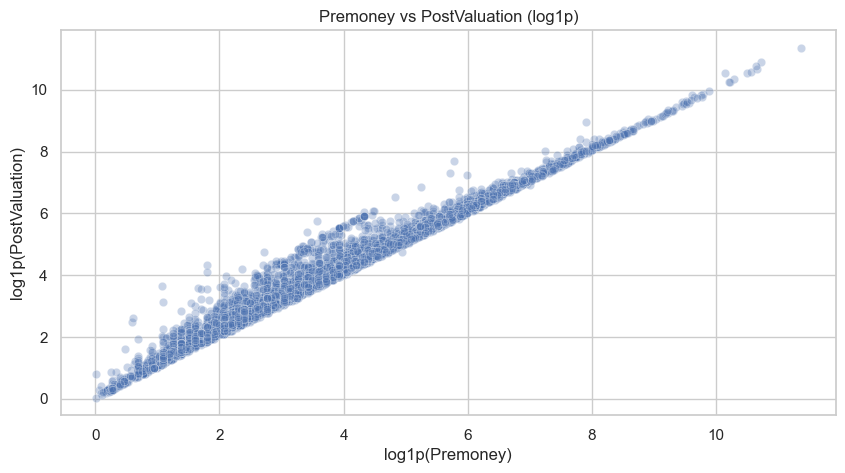

In [11]:
# Numeric summaries and correlations
num = deals_joined.select_dtypes(include=[np.number])
display(num.describe().T)
# correlation heatmap
corr = num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=False, cmap='vlag', center=0)
plt.title('Numeric correlation matrix (upper triangle masked)')
plt.show()
# Premoney vs PostValuation scatter (log-log) if both present
if 'PremoneyValuation' in deals_joined.columns and 'PostValuation' in deals_joined.columns:
    m = deals_joined[['PremoneyValuation','PostValuation']].dropna()
    plt.figure()
    sns.scatterplot(x=np.log1p(m['PremoneyValuation']), y=np.log1p(m['PostValuation']), alpha=0.3)
    plt.xlabel('log1p(Premoney)')
    plt.ylabel('log1p(PostValuation)')
    plt.title('Premoney vs PostValuation (log1p)')
    plt.show()

Summary by year for DealDate


,deals_count,postval_median,postval_missing_count,postval_missing_percent
DealDate_year,,,,
1934.0,1,NaN,1,100.0
1950.0,2,NaN,2,100.0
1951.0,1,NaN,1,100.0
1954.0,1,NaN,1,100.0
1956.0,1,NaN,1,100.0
1961.0,1,NaN,1,100.0
1962.0,2,NaN,2,100.0
1970.0,1,NaN,1,100.0
1973.0,2,NaN,2,100.0


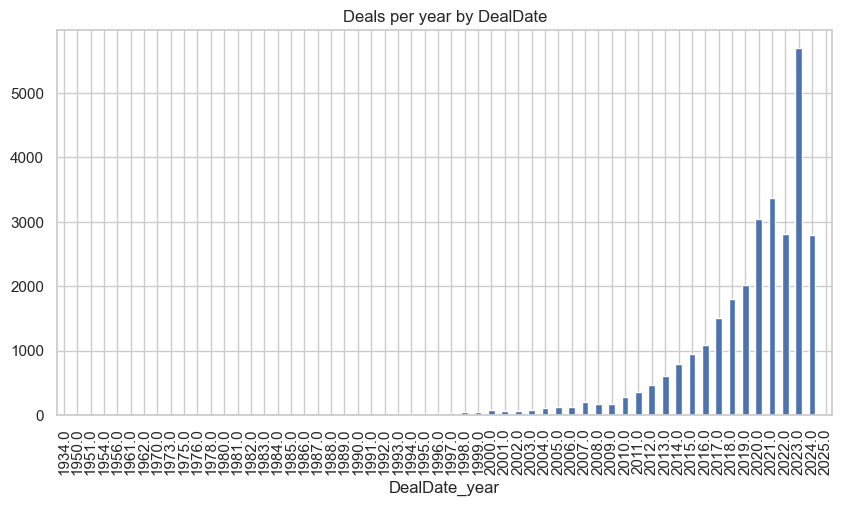

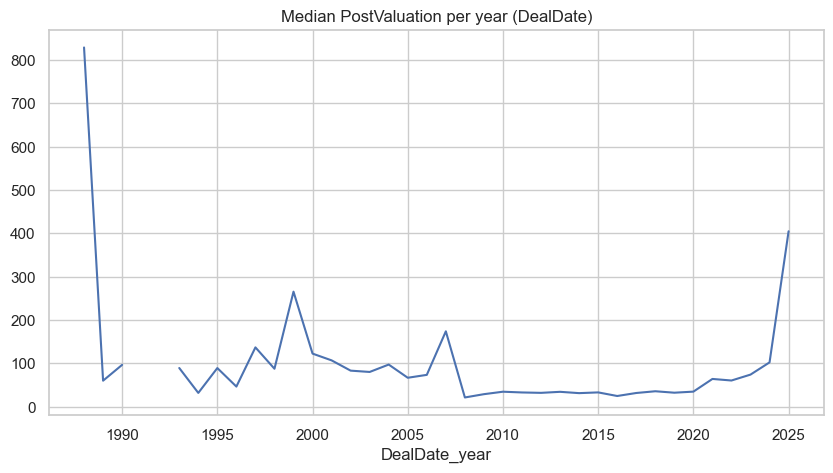

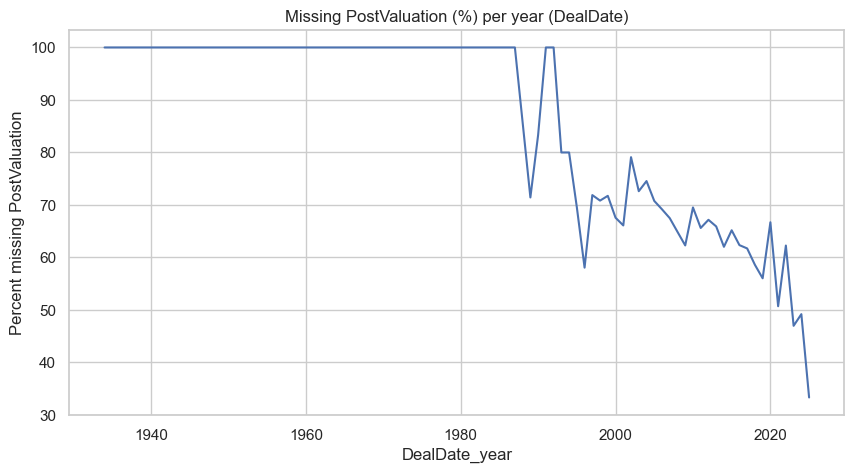

Summary by year for AnnouncedDate


,deals_count,postval_median,postval_missing_count,postval_missing_percent
AnnouncedDate_year,,,,
1989.0,2,43.529412,1,50.00
1993.0,3,NaN,3,100.00
1994.0,2,31.500000,0,0.00
1995.0,4,302.813729,2,50.00
1996.0,2,NaN,2,100.00
1997.0,4,158.207355,3,75.00
1998.0,14,80.819713,10,71.43
1999.0,14,373.669443,8,57.14
2000.0,31,504.925000,23,74.19


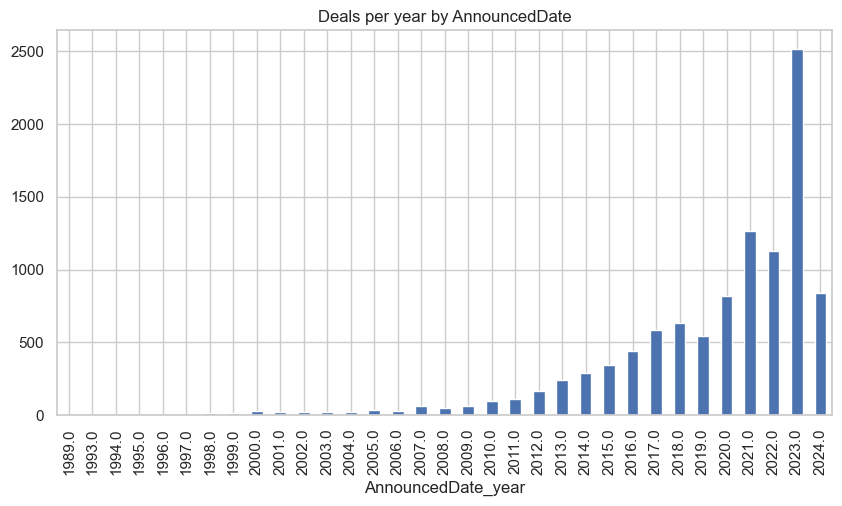

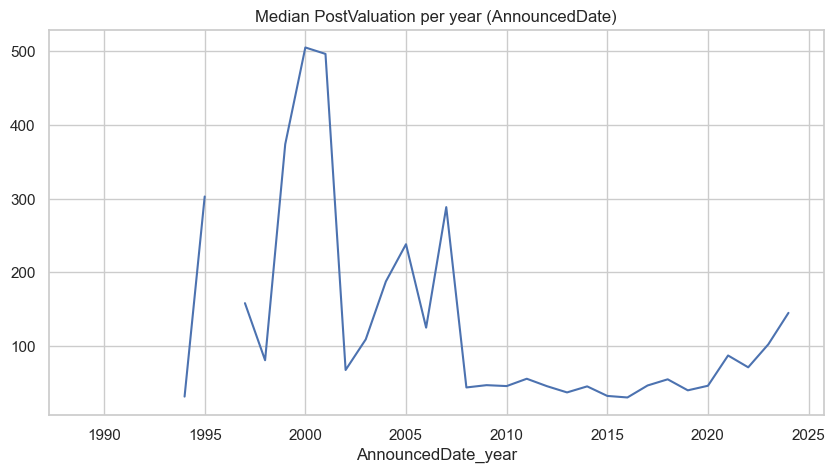

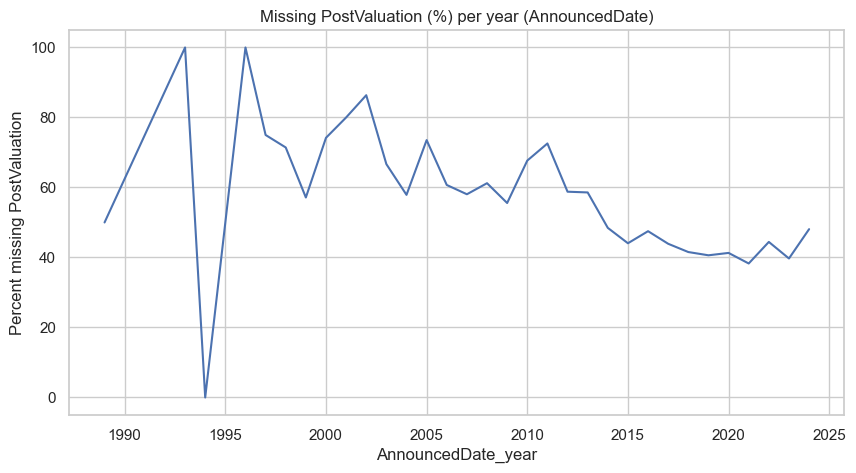

In [14]:
# Time-based exploration
for dtcol in ['DealDate','AnnouncedDate']:
    if dtcol in deals_joined.columns:
        deals_joined[dtcol + '_year'] = deals_joined[dtcol].dt.year
        yearly = deals_joined.groupby(dtcol + '_year').agg(
            deals_count=('DealNo', 'count'),
            postval_median=('PostValuation', lambda s: s.dropna().median()),
            postval_missing_count=('PostValuation', lambda s: s.isna().sum())
        ).sort_index()
        yearly['postval_missing_percent'] = (yearly['postval_missing_count'] / yearly['deals_count'] * 100).round(2)
        print('Summary by year for', dtcol)
        display(yearly.head(20))

        plt.figure()
        yearly['deals_count'].plot(kind='bar')
        plt.title(f'Deals per year by {dtcol}')
        plt.show()

        # median PostValuation per year (drop NA)
        plt.figure()
        yearly['postval_median'].plot()
        plt.title(f'Median PostValuation per year ({dtcol})')
        plt.show()

        # missing percent per year
        plt.figure()
        yearly['postval_missing_percent'].plot()
        plt.ylabel('Percent missing PostValuation')
        plt.title(f'Missing PostValuation (%) per year ({dtcol})')
        plt.show()

DealStatus
Completed                29415
Announced/In Progress      633
Failed/Cancelled           510
Upcoming                    77
Rumor/Speculation           32
In Bidding Process           7
Postponed                    6
Name: count, dtype: int64


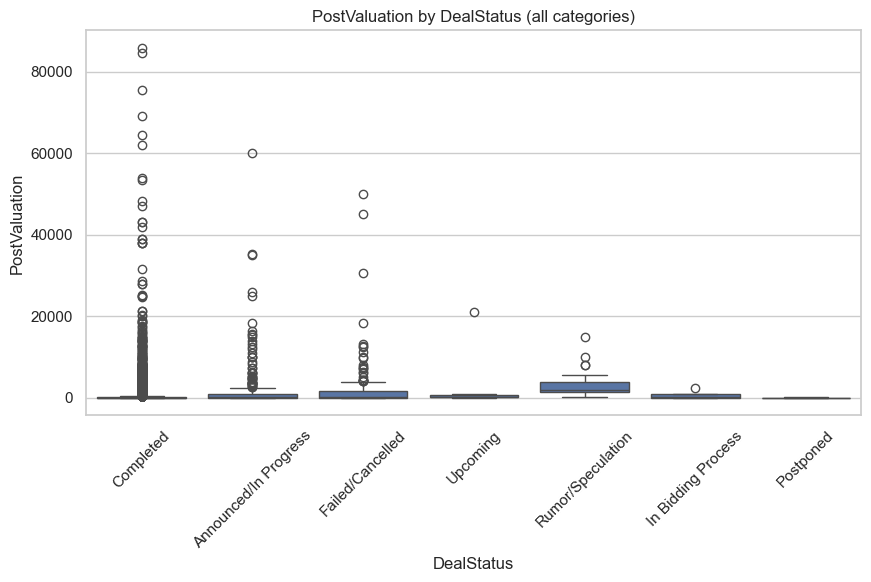

DealSize mean where PostValuation present: 230.34102112811297
DealSize mean where PostValuation missing: 112.579571841182


In [18]:
# Missingness vs features

print(deals_joined['DealStatus'].value_counts())

deals_joined['has_postval'] = deals['PostValuation'].notna()
plt.figure()

# use a boolean mask computed from deals_joined (aligned index) to avoid NA mask errors
mask = deals_joined['PostValuation'].notna()
sns.boxplot(x='DealStatus', y='PostValuation',
            data=deals_joined.loc[mask, :],
            order=deals_joined['DealStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('PostValuation by DealStatus (all categories)')
plt.show()
# compare DealSize when PostValuation present vs missing
# ensure boolean has_postval aligned to deals_joined index
deals_joined['has_postval'] = mask
print('DealSize mean where PostValuation present:', deals_joined.loc[deals_joined['has_postval'],'DealSize'].mean())
print('DealSize mean where PostValuation missing:', deals_joined.loc[~deals_joined['has_postval'],'DealSize'].mean())

In [20]:
# Verifying that all numbers are in USD for non-USD deals

deals[
    (deals['NativeCurrencyOfDeal'] != 'US Dollars (USD)') &
    (deals['PostValuation'].notna())
][['CompanyName', 'NativeCurrencyOfDeal', 'PostValuation', 'DealDate']].head(5)

#https://www.cnbc.com/2021/04/14/coinbase-to-debut-on-nasdaq-in-direct-listing.html
#https://www.businesskorea.co.kr/news/articleView.html?idxno=207250
#https://www.onenetwork.com/2024/03/blue-yonder-to-acquire-one-network-enterprises/


,CompanyName,NativeCurrencyOfDeal,PostValuation,DealDate
DealID,,,,
247042-45T,Gridflex Energy,South-Korean Won (KRW),169.310582,2025-04-30
256686-04T,MP Materials,South-Korean Won (KRW),4087.709891,2024-04-09
255802-24T,Dextara,India Rupees (INR),20.955551,2024-04-01
255710-89T,One Network Enterprises,Japanese Yen (JPY),848.602901,2024-03-29
247787-74T,Superpedestrian (European Operations),Euros (EUR),5.416938,2024-03-12


# Numeric summary
num = deals_joined.select_dtypes(include=[np.number])





display(pd.DataFrame(deals_joined.dtypes, columns=['dtype']))print('Column dtypes:')# Print types of all columnsdisplay(num.describe().T)- `PostValuation` is missing for a large fraction of rows (~half).
- Numeric features show strong skew; log-transforms help visualization and modeling.
- Missing pattern should be addressed before modeling.
- Currency normalization isn't required because the data is already in USD.
- Next steps: feature engineering, outlier handling, cross-validated modeling.

In [21]:
num = deals_joined.select_dtypes(include=[np.number])
display(num.describe().T)

,count,mean,std,min,25%,50%,75%,max
DealNo,30680.0,4.866330,4.678325,1.000000,2.000000,3.000000,6.000000,50.000000
DealSize,25144.0,171.699154,1305.616956,0.000033,3.000000,10.138112,47.000000,75400.000000
PremoneyValuation,10357.0,244.394620,1597.796726,0.013013,11.999996,31.000000,100.000000,85800.000000
PostValuation,12684.0,510.766002,2773.326023,0.032500,19.500001,54.043151,195.000000,85800.000000
PercentAcquired,12831.0,40.418216,32.243923,0.005000,16.960000,28.570000,51.000000,100.000000
RaisedToDate,25425.0,424.631197,2613.805591,0.001000,6.000000,22.890545,105.250000,79586.000000
TotalInvestedCapital,22402.0,81.529253,354.353021,0.000033,2.594863,9.098380,32.000000,13000.000000
InvestorOwnership,8787.0,48.959077,18.988938,0.625016,34.564417,48.521226,62.848347,99.582394
TotalInvestedEquity,17333.0,46.132435,238.174420,0.001000,3.598630,9.962489,28.000000,12800.000000
TotalNewDebt,4530.0,282.749208,682.175683,0.001144,2.751198,21.982500,275.461250,13000.000000
